# **Day 11**

**Naive Bayes Classifier**

It is a kind of classifier that works on Bayes theorem. Prediction of membership probabilities is made for every class such as the probability of data points is associated a particular class.

**Problem Statement**

To classify patients as diabetic or non-diabetic. The dataset has several different medical predictor features and a target that is **Outcome**. Predictor variables include the number of pregnancies that patient had, their BMI, insulin level, age and so on.....

In [20]:
#import libraries
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [21]:
#lets define col names
colnames = ['preg','plas','pres','skin','test','mass','pedi','age','class']
pimadf = pd.read_csv("../input/data-science-machine-learning-and-ai-using-python/pima-indians-diabetes.data", names=colnames)

In [22]:
pimadf.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
std = StandardScaler()

In [24]:
X = pimadf.drop("class", axis=1)
Y = pimadf['class']

In [25]:
X = std.fit_transform(X)

In [26]:
#Lets split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state=7)

In [27]:
#lets choose the model
model = GaussianNB()

In [28]:
#Lets train the model
model.fit(X_train, Y_train)
print(model)

GaussianNB()


In [29]:
#lets make the predictions
pred = model.predict(X_test)

In [30]:
#lets check the accuracy of the model by printing its score
from sklearn.metrics import accuracy_score, confusion_matrix

model_score = model.score(X_test, Y_test)
model_score

0.7402597402597403

In [31]:
metrics.confusion_matrix(pred, Y_test)

array([[116,  29],
       [ 31,  55]])

In [32]:
#lets find the probability
y_pred_prob = model.predict_proba(X_test)

In [33]:
from sklearn.metrics import auc, roc_curve

fpr,tpr,thresholds = roc_curve(Y_test, y_pred_prob[::,1])
roc_auc = auc(fpr,tpr)
roc_auc

0.7973760932944606

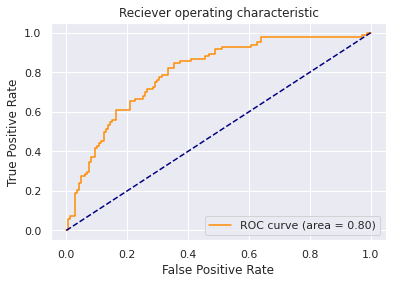

In [34]:
#lets plot the roc curve
plt.plot(fpr,tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever operating characteristic')
plt.legend(loc='lower right')
plt.show()

**KMeans Clustering**

Division of datapoints into clusters such that each data point is present in only one cluster

**Problem Statement**

To analyze the type of customers in the market based on the features

In [35]:
#lets import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [36]:
#load the data into data variable
data = pd.read_csv('../input/data-science-machine-learning-and-ai-using-python/Example.csv')
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


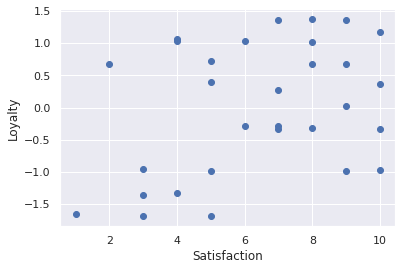

In [37]:
#plot the data using scatter plot: hint: x=data[Satisfaction], y=data['Loyalty]
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [38]:
#copy the entire data into X and select the features
X = data.copy()

In [39]:
#Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [40]:
#Lets copy the clustering result
clusters = X.copy()
clusters['cluster_pred'] = kmeans.fit_predict(X)

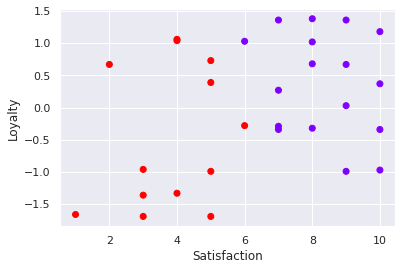

In [41]:
#lets plot the clustered data
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'], c = clusters['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [42]:
#lets standardize the variables
from sklearn import preprocessing

x_scaled = preprocessing.scale(X)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [43]:
#Elbow method
wcss = []

for i in range(1,30):
  kmeans = KMeans(i)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

wcss

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.634898754940157,
 5.536204767735098,
 4.337110750237059,
 3.785174850151503,
 3.23319493646536,
 2.912128947462148,
 2.345634096200805,
 2.254628937372888,
 1.8440019769628373,
 1.6316144524579816,
 1.3544229429995762,
 1.2030076333792485,
 0.969991744083592,
 0.7836342923714029,
 0.737699376358283,
 0.5358866008627644,
 0.42313027513905704,
 0.32271198172750115,
 0.2472105330779867,
 0.17170908442847233,
 0.11383861748989679,
 0.0559681505513213,
 0.0014517677692203244,
 0.00020024383023728806]

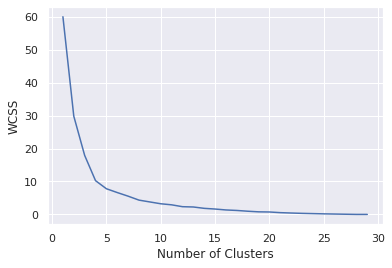

In [44]:
#lets visualize the elbow method
plt.plot(range(1,30), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [45]:
#now lets take clusters = 4
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)

cluster_new = X.copy()
cluster_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
cluster_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,1
2,5,-0.99,2
3,7,-0.29,1
4,4,1.06,0
5,1,-1.66,2
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,3
9,8,0.68,3


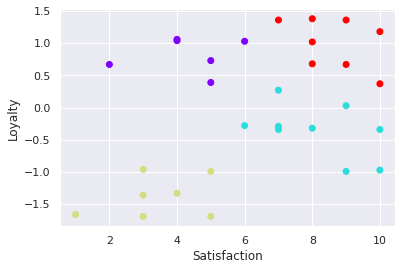

In [46]:
plt.scatter(cluster_new['Satisfaction'],cluster_new['Loyalty'], c = cluster_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

**Analysis**

1. **Blue Churn:** These are the customers who are less satisfied and less loyal, and therfore can be termed as *Alienated*

2. **Yellow Churn :** These people are less satisfied but are highly loyal

3. **Purple Churn :** These people are with high loyality and high satisfaction and they are termed as *Fans*

4. **Red Churn :** These are the people who are in midst of the things.